In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as patches
from matplotlib.legend import Legend
import matplotlib.cm as cm
import matplotlib.ticker as ticker

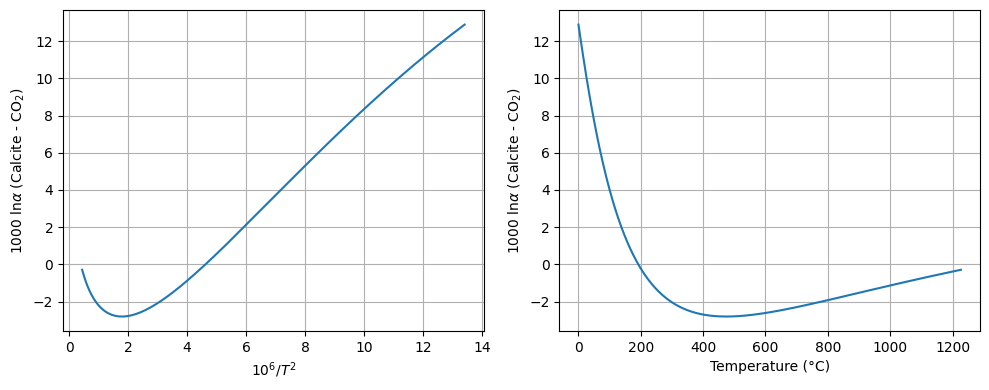

In [ ]:
# understanding relation between fractionation and temperature for carbon isotope

T = np.linspace(273.15, 1500, 1000) # Temperature range for plotting (in Kelvin)
T_celsius = T - 273.15 
T_inv_C = 1e6/T**2 # inversion of temperature

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,4))

# 1st plot
ln_alpha = (((-8.914e8 / T**3) + (8.557e6 / T**2) + (-18.11e3 / T) + 8.24)) # Ohmoto and Rye (1979)
ax1.plot(T_inv_C, ln_alpha)
ax1.set_xlabel(r'$10^6/T^2$')
ax1.set_ylabel(r'1000 ln$\alpha$ (Calcite - CO$_{2}$)')
ax1.grid(True)

# 2nd plot
alpha = np.exp(10**(-3)*ln_alpha)
ax2.plot(T_celsius, ln_alpha)
ax2.set_xlabel('Temperature (°C)')
ax2.set_ylabel(r'1000 ln$\alpha$ (Calcite - CO$_{2}$)')
ax2.grid(True)

plt.tight_layout()

# Save the plot with high resolution
high_res_file_path = 'alpha_C_vs_T.png'
# plt.savefig(high_res_file_path, dpi = 600)

In [ ]:
# Defining constants and function for plotting the equation
def delta13C_rock_f(delta13C_rock_i, r, delta13C_fluid_i, T):  # r is fluid to rock ratio
    ln_alpha_CaCO3_CO2 = (-8.914e8 / T**3) + (8.557e6 / T**2) + (-18.11e3 / T) + 8.24
    term = ln_alpha_CaCO3_CO2
    # alpha_HCO3_CO2 = np.exp(10**-3*((0e8 / T**3) + (-2.16e6 / T**2) + (20.16e3 / T) -35.7))  # considering CO2 and HCO3 contribution to isotope exchange
    # term = (ln_alpha_CaCO3_CO2) - 10**3*np.log(alpha_HCO3_CO2 + 0.1*(1 - alpha_HCO3_CO2))
    return (delta13C_rock_i + r * (delta13C_fluid_i + term)) / (1 + r) # final equation for delta13C_rock_f

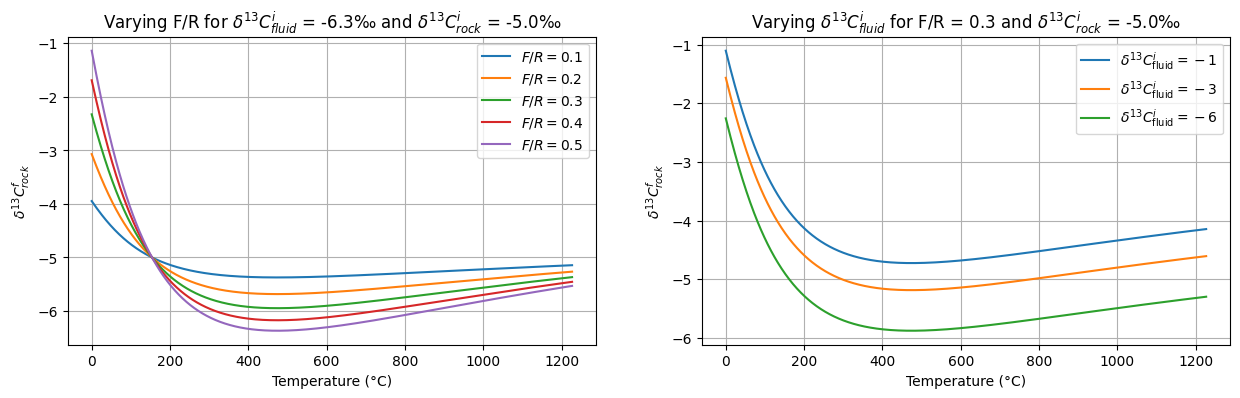

In [ ]:
# Intial Rock composition from Kamthai
delta13C_rock_i = -5        # KC-16 from Kamthai Carbonatite
delta13C_fluid_i = -6.3     # assumption from Upadhyay et al., (2021)

# Plot multiple curves for different r
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,4))

# Case I
# Plot for different values of r (Fluid to Rock ratio for Carbonate) to plot multiple curves
r_values = np.array([0.1,0.2,0.3,0.4,0.5])

for r in r_values:
    delta13C_rock_f_vals = delta13C_rock_f(delta13C_rock_i, r, delta13C_fluid_i, T)
    label = rf'$F/R={r}$'
    ax1.plot(T_celsius, delta13C_rock_f_vals, label=label)

# Case II
# Plot for different values of Fluid Composition
delta13C_fluid_i_values = np.array([-1,-3,-6])
r = 0.3     # fluid to rock ratio

for i in delta13C_fluid_i_values:
    delta13C_rock_f_vals = delta13C_rock_f(delta13C_rock_i, r, i, T)
    # label = rf'$delta^{13}C_{fluid}^{i}={i}$'
    label = rf'$\delta^{{13}}C_{{\mathrm{{fluid}}}}^{{i}}={i}$'
    ax2.plot(T_celsius, delta13C_rock_f_vals, label=label)

# Adding title and labels
ax1.set_title(r'Varying F/R for $\delta^{13}C_{fluid}^i$ = -6.3$\perthousand$ and $\delta^{13}C_{rock}^i$ = -5.0$\perthousand$')
ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel(r'$\delta^{13}C_{rock}^f$')
ax1.grid(True)
ax1.legend(loc=1)

ax2.set_title(r'Varying $\delta^{13}C_{fluid}^i$ for F/R = 0.3 and $\delta^{13}C_{rock}^i$ = -5.0$\perthousand$')
ax2.set_xlabel('Temperature (°C)')
ax2.set_ylabel(r'$\delta^{13}C_{rock}^f$')
ax2.grid(True)
ax2.legend(loc=1)

# Save the plot with high resolution
high_res_file_path = 'd13C_vs_T_2.png'
# plt.savefig(high_res_file_path, dpi = 600)

In [4]:
def beta(C0, C1, C2, C3, C4, C5, C6, T):
    x = 10**6/T**2
    term = C0 + C1*x - C2*x**2/10 + C3*x**3/10**2 - C4*x**4/10**3 + C5*x**5/10**5 - C6*x**6/10**6   # Chacko and Deines (2008)
    # term = C0 + C1*x
    return term

In [7]:
def alpha_A_B(beta_A, beta_B):
    return np.exp(10**-3 * (beta_A - beta_B))   # Chacko and Deines (2008)

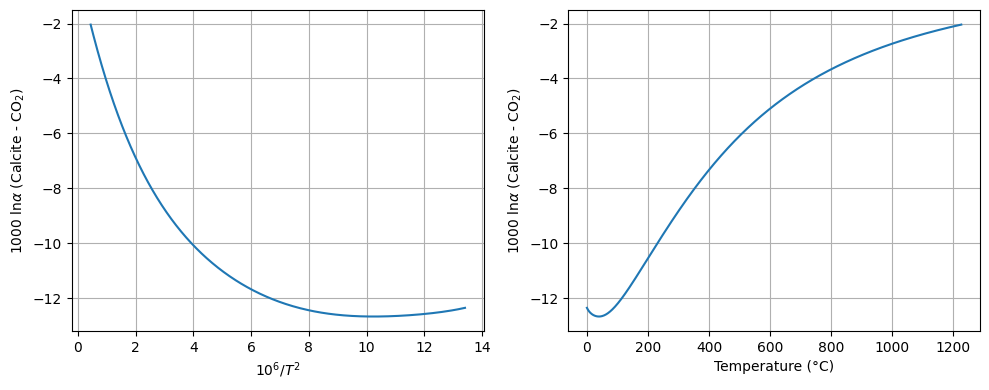

In [8]:
# Temperature alpha relationship for oxygen isotope
T = np.linspace(273.15, 1500, 1000)
T_celsius = T - 273.15
T_inv = 1e6/T**2

beta_CaCO3 = beta(0, 11.750, 4.6655, 3.1252, 1.8869, 7.4768, 1.3404, T)            
beta_CO2 = beta(0, 16.7604, 14.8378, 16.9027, 13.7557, 63.7350, 12.3984, T)
beta_H2O = beta(12.815, 6.237, 1.254, 0.2419, 0, 0, 0, T)
alpha_CaCO3_CO2 = alpha_A_B(beta_CaCO3, beta_CO2)
alpha_H2O_CO2 = alpha_A_B(beta_H2O, beta_CO2)

def ln_O_alpha(beta_A, beta_B):
    return (beta_A - beta_B)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,4))

# 1st plot
ln_alpha = ln_O_alpha(beta_CaCO3, beta_CO2)
ax1.plot(T_inv, ln_alpha)
ax1.set_xlabel(r'$10^6/T^2$')
ax1.set_ylabel(r'1000 ln$\alpha$ (Calcite - CO$_{2}$)')
ax1.grid(True)

# 2nd plot
ax2.plot(T_celsius, ln_alpha)
ax2.set_xlabel('Temperature (°C)')
ax2.set_ylabel(r'1000 ln$\alpha$ (Calcite - CO$_{2}$)')
ax2.grid(True)

plt.tight_layout()

# Save the plot with high resolution
high_res_file_path = 'alpha_O_vs_T.png'
# plt.savefig(high_res_file_path, dpi = 600)

In [10]:
# Defining delta18O_rock_f function
def delta18O_rock_f(delta18O_rock_i, delta18O_fluid_i, r0, r1, alpha_CaCO3_CO2, alpha_H2O_CO2):
    return (delta18O_rock_i + r0 * (delta18O_fluid_i + 10**3 * (np.log(alpha_CaCO3_CO2) + np.log(2 * r1 + 1) - np.log(2 * r1 + alpha_H2O_CO2)))) / (1 + r0) # final equation for delta18O_rock_f

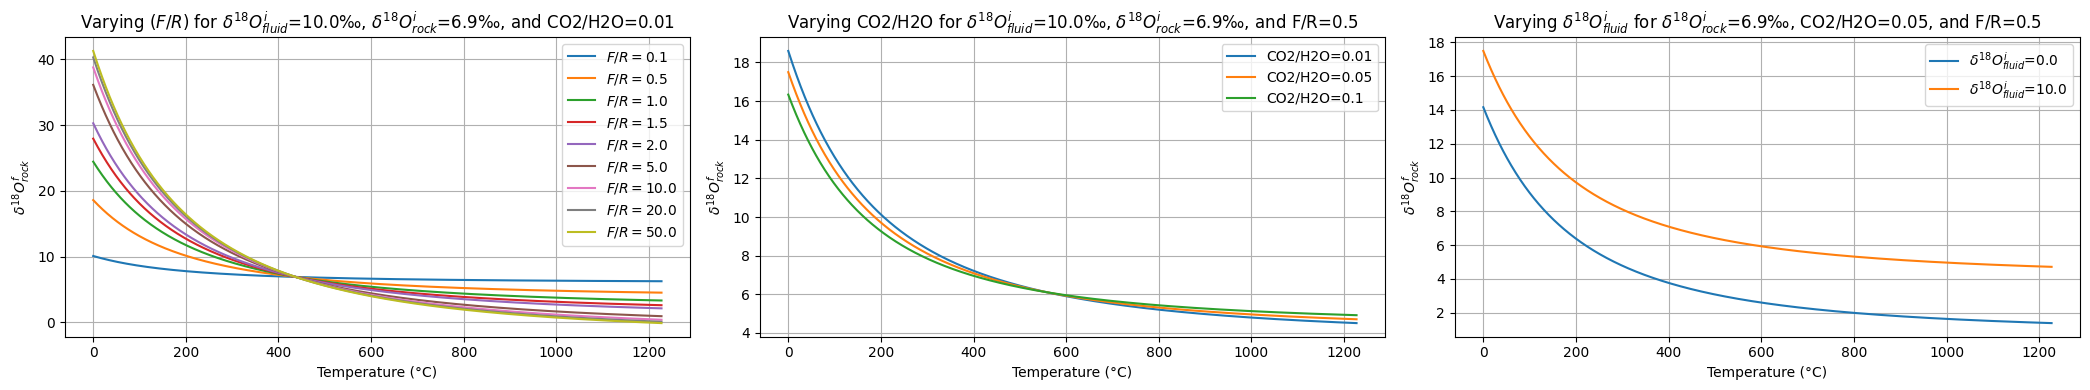

In [11]:
delta18O_rock_i = 6.9   # KC-16 from Kamthai Carbonatite

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (21,4))

# Case I: Plot for different r Fluid to Rock ratio
delta18O_fluid_i = 10.0
r1 = 0.01  # CO2/H2O ratio
r0_values = np.array([0.1,0.5,1,1.5,2,5,10,20,50])   # Fluid to Rock Ratio for Oxygen

for r0 in r0_values:
    delta18O_rock_f_vals = delta18O_rock_f(delta18O_rock_i, delta18O_fluid_i, r0, r1, alpha_CaCO3_CO2, alpha_H2O_CO2)
    label = rf'$F/R={r0}$'
    ax1.plot(T_celsius, delta18O_rock_f_vals, label=label)

# Adding title and labels
ax1.set_title(rf'Varying $(F/R)$ for $\delta^{{18}}O_{{fluid}}^i$={delta18O_fluid_i}$\perthousand$, $\delta^{{18}}O_{{rock}}^i$={delta18O_rock_i}$\perthousand$, and CO2/H2O={r1}')
ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel(r'$\delta^{18}O_{rock}^f$')
ax1.grid(True)
ax1.legend(loc=1)

# Case II: Plot for different rc CO2/H2O molar ratio
delta18O_fluid_i = 10.0
r1_values = np.array([0.01, 0.05, 0.1])  # CO2/H2O ratio
r0 = 0.5   # Fluid to Rock Ratio for Oxygen

for r1 in r1_values:
    delta18O_rock_f_vals = delta18O_rock_f(delta18O_rock_i, delta18O_fluid_i, r0, r1, alpha_CaCO3_CO2, alpha_H2O_CO2)
    label = rf'CO2/H2O={r1}'
    ax2.plot(T_celsius, delta18O_rock_f_vals, label=label)

# Adding title and labels
ax2.set_title(rf'Varying CO2/H2O for $\delta^{{18}}O_{{fluid}}^i$={delta18O_fluid_i}$\perthousand$, $\delta^{{18}}O_{{rock}}^i$={delta18O_rock_i}$\perthousand$, and F/R={r0}')
ax2.set_xlabel('Temperature (°C)')
ax2.set_ylabel(r'$\delta^{18}O_{rock}^f$')
ax2.grid(True)
ax2.legend(loc=1)

# Case III: Plot for different fluid composition
delta18O_fluid_i_values = np.array([0.0 ,10.0])
r1 = 0.05  # CO2/H2O ratio

for delta18O_fluid_i in delta18O_fluid_i_values:
    delta18O_rock_f_vals = delta18O_rock_f(delta18O_rock_i, delta18O_fluid_i, r0, r1, alpha_CaCO3_CO2, alpha_H2O_CO2)
    label = rf'$\delta^{{18}}O_{{fluid}}^i$={delta18O_fluid_i}'
    ax3.plot(T_celsius, delta18O_rock_f_vals, label=label)

# Adding title and labels
ax3.set_title(rf'Varying $\delta^{{18}}O_{{fluid}}^i$ for $\delta^{{18}}O_{{rock}}^i$={delta18O_rock_i}$\perthousand$, CO2/H2O={r1}, and F/R={r0}')
ax3.set_xlabel('Temperature (°C)')
ax3.set_ylabel(r'$\delta^{18}O_{rock}^f$')
ax3.grid(True)
ax3.legend(loc=1)

plt.tight_layout()


# Save the plot with high resolution
high_res_file_path = 'd18O_vs_T.png'
# plt.savefig(high_res_file_path, dpi = 600)

In [ ]:
# file_path example = r'/Users/ayushgupta/Desktop/Project/Kamthai Carbonatite/Data/Isotope.xlsx'
file_path = r'PATH/TO/ISOTOPE/FILE.xlsx'

# Reading the data from the Excel file
# Replace 'Sheet1' with the name of the sheet containing your data if it's different
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Check the first few rows to confirm the data has been read correctly
print(data.head())

   d13C   d18O        REE label             Sample
0 -5.11   6.93   4983.885     c              KC-16
1 -3.64   8.31  11558.894     c     KC-6          
2 -4.49   9.70  22889.257     c  KC-14            
3 -2.80  10.30   6212.612     c      KC-7         
4 -4.85  11.90   6108.765     c              KC-19


<>:33: SyntaxWarning: invalid escape sequence '\d'
<>:33: SyntaxWarning: invalid escape sequence '\p'
<>:33: SyntaxWarning: invalid escape sequence '\d'
<>:33: SyntaxWarning: invalid escape sequence '\p'
/var/folders/gt/61sm9_1j32v3tfyjw7bmfdvw0000gn/T/ipykernel_31825/1512374119.py:33: SyntaxWarning: invalid escape sequence '\d'
  ax1.set_title(f'Case I: Varying Temp for $\delta^{{18}}O_{{fluid}}^i={delta18O_fluid_i_values} \perthousand$')
/var/folders/gt/61sm9_1j32v3tfyjw7bmfdvw0000gn/T/ipykernel_31825/1512374119.py:33: SyntaxWarning: invalid escape sequence '\p'
  ax1.set_title(f'Case I: Varying Temp for $\delta^{{18}}O_{{fluid}}^i={delta18O_fluid_i_values} \perthousand$')


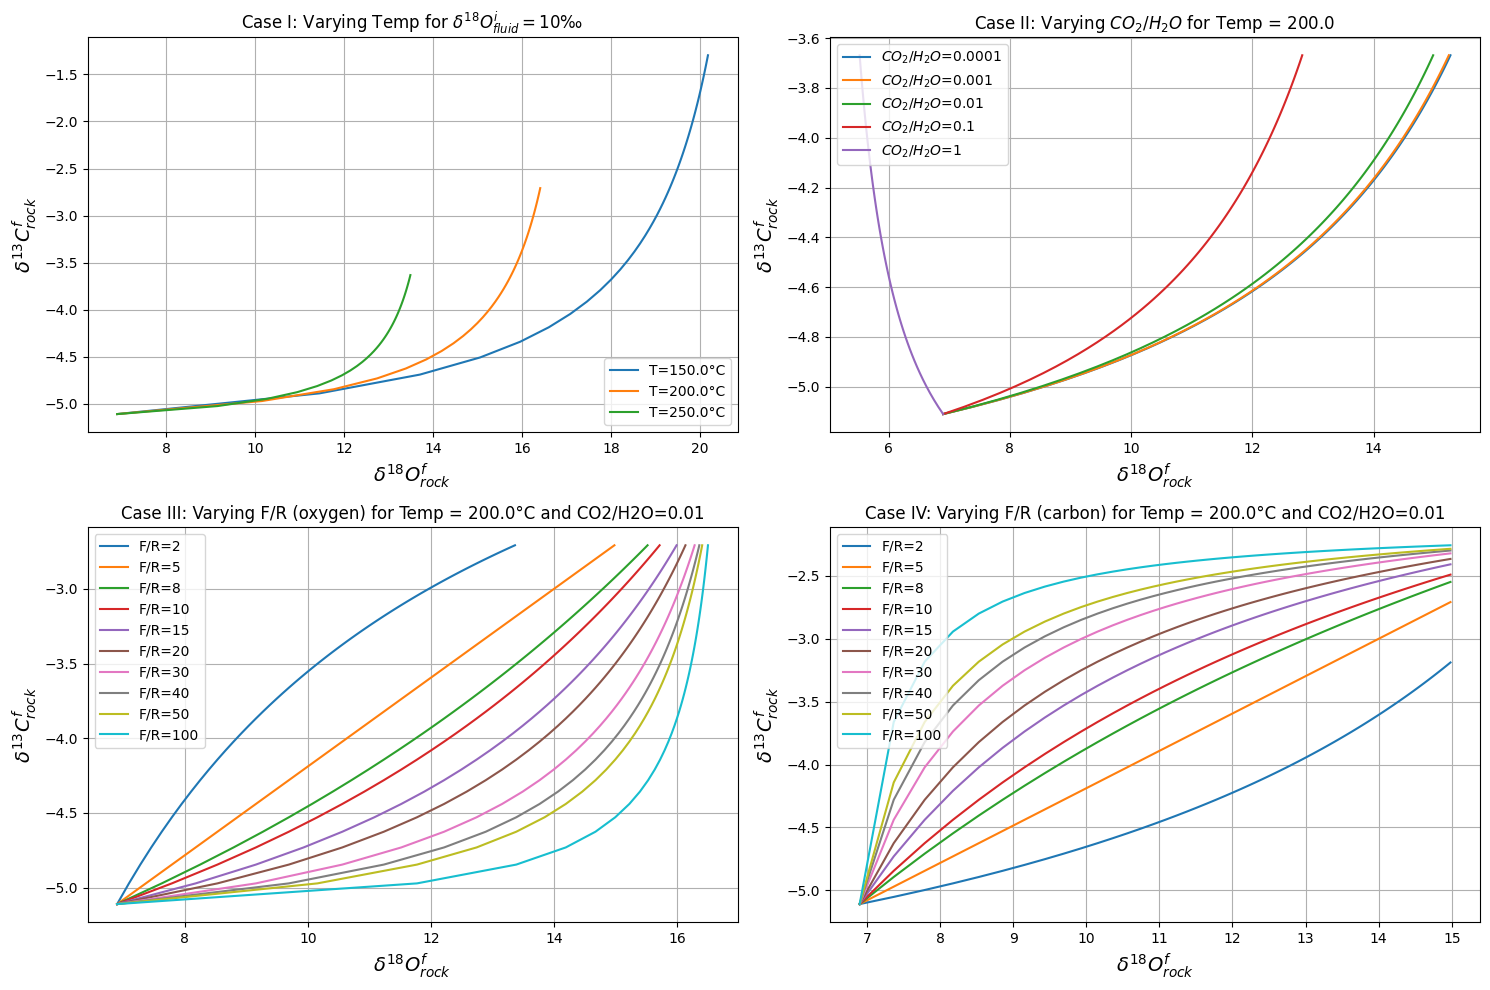

In [13]:
delta13C_rock_i = -5.11
delta18O_rock_i = 6.9
delta13C_fluid_i = -2
delta18O_fluid_i_values = 10

r1 = 0.01                       # CO2/H2O molar ratio
rc = np.linspace(0, 5, 100)     # Fluid/Rock ratio for Carbon
# r0 = ((2*r1+1)/3*r1)*rc       # Fluid/Rock ratio for Oxygen
r0 =  np.linspace(0, 50, 100)   # Fluid/Rock ratio for Oxygen

# plt.figure(figsize = (9,7))
fig, axs = plt.subplots(2,2,figsize=(15,10))
ax1, ax2, ax3, ax4 = axs[0, 0], axs[0, 1], axs[1, 0], axs[1, 1]

#Case I: Change in Temperature
Temp_values = [423.15, 473.15, 523.15] # Assumed Temperature

for T_i in Temp_values:
    
    T_celsius = T_i -273.15

    beta_CaCO3 = beta(0, 11.750, 4.6655, 3.1252, 1.8869, 7.4768, 1.3404, T_i)            
    beta_CO2 = beta(0, 16.7604, 14.8378, 16.9027, 13.7557, 63.7350, 12.3984, T_i)
    beta_H2O = beta(12.815, 6.237, 1.254, 0.2419, 0, 0, 0, T_i)
    alpha_CaCO3_CO2 = alpha_A_B(beta_CaCO3, beta_CO2)
    alpha_H2O_CO2 = alpha_A_B(beta_H2O, beta_CO2)

    delta13C_rock_f_vals = delta13C_rock_f(delta13C_rock_i, rc, delta13C_fluid_i, T_i)
    delta18O_rock_f_vals = delta18O_rock_f(delta18O_rock_i, delta18O_fluid_i, r0, r1, alpha_CaCO3_CO2, alpha_H2O_CO2)
    
    ax1.plot(delta18O_rock_f_vals, delta13C_rock_f_vals, label=f'T={T_celsius:.1f}°C')

ax1.set_title(f'Case I: Varying Temp for $\delta^{{18}}O_{{fluid}}^i={delta18O_fluid_i_values} \perthousand$')
ax1.set_xlabel(r'$\delta^{18}O_{rock}^f$', fontstyle='normal', fontsize=14, fontweight='bold')
ax1.set_ylabel(r'$\delta^{13}C_{rock}^f$', fontstyle='normal', fontsize=14, fontweight='bold')
ax1.grid(True)
ax1.legend(loc = 4)

# Case II: Change in CO2/H2O molar ratio

r1_values = [0.0001, 0.001, 0.01, 0.1, 1] # CO2/H2O molar ratio
rc = np.linspace(0, 1, 100) #Fluid/Rock ratio for Carbon
r0_values = 5
T_i = 473.15
T_celsius = T_i - 273.15

for r1 in r1_values:
    
    r0 =  np.linspace(0, r0_values, 100) #Fluid/Rock ratio for Oxygen

    beta_CaCO3 = beta(0, 11.750, 4.6655, 3.1252, 1.8869, 7.4768, 1.3404, T_i)            
    beta_CO2 = beta(0, 16.7604, 14.8378, 16.9027, 13.7557, 63.7350, 12.3984, T_i)
    beta_H2O = beta(12.815, 6.237, 1.254, 0.2419, 0, 0, 0, T_i)
    alpha_CaCO3_CO2 = alpha_A_B(beta_CaCO3, beta_CO2)
    alpha_H2O_CO2 = alpha_A_B(beta_H2O, beta_CO2)

    delta13C_rock_f_vals = delta13C_rock_f(delta13C_rock_i, rc, delta13C_fluid_i, T_i)
    delta18O_rock_f_vals = delta18O_rock_f(delta18O_rock_i, delta18O_fluid_i, r0, r1, alpha_CaCO3_CO2, alpha_H2O_CO2)
    
    ax2.plot(delta18O_rock_f_vals, delta13C_rock_f_vals, label=f'$CO_2/H_2O$={r1}')

ax2.set_title(f'Case II: Varying $CO_2/H_2O$ for Temp = {T_celsius}')
ax2.set_xlabel(r'$\delta^{18}O_{rock}^f$', fontstyle='normal', fontsize=14, fontweight='bold')
ax2.set_ylabel(r'$\delta^{13}C_{rock}^f$', fontstyle='normal', fontsize=14, fontweight='bold')
ax2.grid(True)
ax2.legend(loc = 2)


#Case III: Change in Fluid to Rock ratio for Oxygen
r1 = 0.01 # CO2/H2O molar ratio
rc = np.linspace(0, 5, 100) #Fluid/Rock ratio for Carbon
r0_values = [2,5,8,10,15,20,30,40,50,100]

for i in r0_values:
    
    r0 =  np.linspace(0, i, 100) #Fluid/Rock ratio for Oxygen

    beta_CaCO3 = beta(0, 11.750, 4.6655, 3.1252, 1.8869, 7.4768, 1.3404, T_i)            
    beta_CO2 = beta(0, 16.7604, 14.8378, 16.9027, 13.7557, 63.7350, 12.3984, T_i)
    beta_H2O = beta(12.815, 6.237, 1.254, 0.2419, 0, 0, 0, T_i)
    alpha_CaCO3_CO2 = alpha_A_B(beta_CaCO3, beta_CO2)
    alpha_H2O_CO2 = alpha_A_B(beta_H2O, beta_CO2)

    delta13C_rock_f_vals = delta13C_rock_f(delta13C_rock_i, rc, delta13C_fluid_i, T_i)
    delta18O_rock_f_vals = delta18O_rock_f(delta18O_rock_i, delta18O_fluid_i, r0, r1, alpha_CaCO3_CO2, alpha_H2O_CO2)
    
    ax3.plot(delta18O_rock_f_vals, delta13C_rock_f_vals, label=f'F/R={i}')

ax3.set_title(f'Case III: Varying F/R (oxygen) for Temp = {T_celsius}°C and CO2/H2O={r1}')
ax3.set_xlabel(r'$\delta^{18}O_{rock}^f$', fontstyle='normal', fontsize=14, fontweight='bold')
ax3.set_ylabel(r'$\delta^{13}C_{rock}^f$', fontstyle='normal', fontsize=14, fontweight='bold')
ax3.grid(True)
ax3.legend(loc = 2)

#Case IV: Change in Fluid to Rock ratio for Carbon
rc_values = [2,5,8,10,15,20,30,40,50,100]
r0_values = 5

for i in rc_values:
    
    rc =  np.linspace(0, i, 100) #Fluid/Rock ratio for Carbon
    r0 =  np.linspace(0, r0_values, 100) #Fluid/Rock ratio for Oxygen

    beta_CaCO3 = beta(0, 11.750, 4.6655, 3.1252, 1.8869, 7.4768, 1.3404, T_i)            
    beta_CO2 = beta(0, 16.7604, 14.8378, 16.9027, 13.7557, 63.7350, 12.3984, T_i)
    beta_H2O = beta(12.815, 6.237, 1.254, 0.2419, 0, 0, 0, T_i)
    alpha_CaCO3_CO2 = alpha_A_B(beta_CaCO3, beta_CO2)
    alpha_H2O_CO2 = alpha_A_B(beta_H2O, beta_CO2)

    delta13C_rock_f_vals = delta13C_rock_f(delta13C_rock_i, rc, delta13C_fluid_i, T_i)
    delta18O_rock_f_vals = delta18O_rock_f(delta18O_rock_i, delta18O_fluid_i, r0, r1, alpha_CaCO3_CO2, alpha_H2O_CO2)
    
    ax4.plot(delta18O_rock_f_vals, delta13C_rock_f_vals, label=f'F/R={i}')

ax4.set_title(f'Case IV: Varying F/R (carbon) for Temp = {T_celsius}°C and CO2/H2O={r1}')
ax4.set_xlabel(r'$\delta^{18}O_{rock}^f$', fontstyle='normal', fontsize=14, fontweight='bold')
ax4.set_ylabel(r'$\delta^{13}C_{rock}^f$', fontstyle='normal', fontsize=14, fontweight='bold')
ax4.grid(True)
ax4.legend(loc = 2)


plt.tight_layout()


<>:42: SyntaxWarning: invalid escape sequence '\d'
<>:42: SyntaxWarning: invalid escape sequence '\d'
<>:44: SyntaxWarning: invalid escape sequence '\d'
<>:44: SyntaxWarning: invalid escape sequence '\d'
<>:83: SyntaxWarning: invalid escape sequence '\s'
<>:42: SyntaxWarning: invalid escape sequence '\d'
<>:42: SyntaxWarning: invalid escape sequence '\d'
<>:44: SyntaxWarning: invalid escape sequence '\d'
<>:44: SyntaxWarning: invalid escape sequence '\d'
<>:83: SyntaxWarning: invalid escape sequence '\s'
/var/folders/gt/61sm9_1j32v3tfyjw7bmfdvw0000gn/T/ipykernel_31825/1528280468.py:42: SyntaxWarning: invalid escape sequence '\d'
  line, = ax.plot(delta18O_rock_f_vals, delta13C_rock_f_vals, c='black', linestyle='--', label=f'$\delta^{{13}}C_{{fluid}}^i={delta13C_fluid_i}, \delta^{{18}}O_{{fluid}}^i={delta18O_fluid_i}$')
/var/folders/gt/61sm9_1j32v3tfyjw7bmfdvw0000gn/T/ipykernel_31825/1528280468.py:42: SyntaxWarning: invalid escape sequence '\d'
  line, = ax.plot(delta18O_rock_f_vals, de

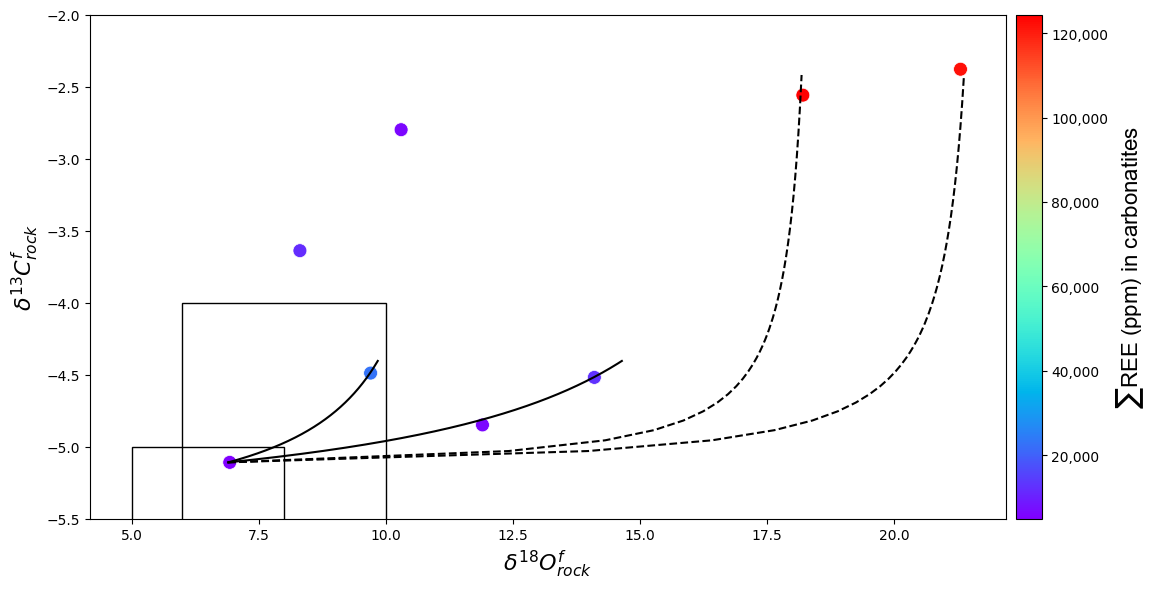

In [14]:
delta13C_rock_i = -5.11
delta18O_rock_i = 6.9

Temp = [473.15, 673.15] # Assumed Temperature

fig, ax = plt.subplots(figsize=(12,6))

# Create a dictionary to store legend handles for each temperature
legend_handles_dict = {}

for T_i in Temp:
    if T_i <= 473.15: 
        r1 = 0.01 #CO2/H2O molar ratio
        delta13C_fluid_i = -2
        delta18O_fluid_i_values = [11.6, 14.8]
        rc_f = 14
        rc = np.linspace(0, rc_f, 500)     #Fluid/Rock ratio for Carbon
    elif T_i > 473.15 and T_i <= 673.15: 
        r1 = 0.1                           #CO2/H2O molar ratio
        delta13C_fluid_i = -1
        delta18O_fluid_i_values = [13.5,19.5]
        rc_f = 1
        rc = np.linspace(0, rc_f, 500)    #Fluid/Rock ratio for Carbon

    
    for delta18O_fluid_i in delta18O_fluid_i_values:
            T_celsius = T_i - 273.15

            r0_f = ((2*r1+1)/(3*r1))*rc_f      
            r0 = np.linspace(0, r0_f, 500)    #Fluid/Rock ratio for Oxygen

            beta_CaCO3 = beta(0, 11.750, 4.6655, 3.1252, 1.8869, 7.4768, 1.3404, T_i)            
            beta_CO2 = beta(0, 16.7604, 14.8378, 16.9027, 13.7557, 63.7350, 12.3984, T_i)
            beta_H2O = beta(12.815, 6.237, 1.254, 0.2419, 0, 0, 0, T_i)
            alpha_CaCO3_CO2 = alpha_A_B(beta_CaCO3, beta_CO2)
            alpha_H2O_CO2 = alpha_A_B(beta_H2O, beta_CO2)

            delta13C_rock_f_vals = delta13C_rock_f(delta13C_rock_i, rc, delta13C_fluid_i, T_i)
            delta18O_rock_f_vals = delta18O_rock_f(delta18O_rock_i, delta18O_fluid_i, r0, r1, alpha_CaCO3_CO2, alpha_H2O_CO2)

            if (T_celsius <= 200):
                line, = ax.plot(delta18O_rock_f_vals, delta13C_rock_f_vals, c='black', linestyle='--', label=f'$\delta^{{13}}C_{{fluid}}^i={delta13C_fluid_i}, \delta^{{18}}O_{{fluid}}^i={delta18O_fluid_i}$')
            else:
                line, = ax.plot(delta18O_rock_f_vals, delta13C_rock_f_vals, c='black', linestyle='-', label=f'$\delta^{{13}}C_{{fluid}}^i={delta13C_fluid_i}, \delta^{{18}}O_{{fluid}}^i={delta18O_fluid_i}$')
            

            # Store the line handle in the corresponding temperature list
            legend_handles_dict.setdefault(T_i, []).append(line)

# # Define the colors for the endpoints of the colormap
# start_color = "#009FFF"  # Blue1
# end_color = "#0000b3"    # Blue2

# # Create a customized colormap
# custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", [start_color, end_color])
# Convert REE values to thousands (k) for better readability
REE_k = data['REE'] / 1000

# Create normalized colormap for REE_k
norm = plt.Normalize(vmin=REE_k.min(), vmax=REE_k.max())
cmap = cm.rainbow

# Customize major ticks
# plt.xticks(ticks=[5, 10, 15, 20, 25, 30])  # Set custom ticks for x-axis
# plt.yticks(ticks=[-10, -8, -6, -4, -2, 0, 2])  # Set custom ticks for y-axis

# Set axis range
# plt.xlim(4, 30)  # Set range for x-axis
plt.ylim(-5.5, -2)  # Set range for y-axis

# Filter the data based on the labels
data_colored = data[data['label'] == 'c']
data_1 = data[data['label'] == 'vt']
data_2 = data[data['label'] == 'cc']
data_3 = data[data['label'] == 'cn']


# Creating the scatter plot
scatter = ax.scatter(data['d18O'], data['d13C'], c=REE_k, cmap=cmap, norm=norm,
                     s=100, edgecolors='w', linewidth=0.5)
# Add colorbar and label
cbar = plt.colorbar(scatter, ax=ax, pad=0.01)
cbar.set_label('$\sum$REE (ppm) in carbonatites', fontsize=16, fontname = 'Arial')
# cbar.set_ticks(np.round(np.linspace(REE_k.min(), REE_k.max(), 5), 1))
cbar.ax.set_yticklabels([f"{tick:.0f},000" for tick in cbar.get_ticks()])
# Plot the additional data without color grading
# plt.scatter(data_1['d18O'], data_1['d13C'], color='#FB9A99', s=100, alpha=0.6, edgecolors='w', linewidth=0.5, label='volcanic tuff')
# plt.scatter(data_2['d18O'], data_2['d13C'], color='#6A3D9A', s=100, alpha=0.6, edgecolors='w', linewidth=0.5, label='carbonaceous chert')
# plt.scatter(data_3['d18O'], data_3['d13C'], color='#33A02C', s=100, edgecolors='w', linewidth=0.5)

rectangles = [
    # {'x': 1, 'y': 2, 'width': 3, 'height': 4, 'color': 'red'},
    {'x': 6, 'y': -8, 'width': 4, 'height': 4, 'color': 'blue'},
    {'x': 5, 'y': -7, 'width': 3, 'height': 2, 'color': 'green'}
]

# Add rectangles to the plot
for rect in rectangles:
    # Create a Rectangle patch
    rectangle = patches.Rectangle(
        (rect['x'], rect['y']),  # (x,y) position of the lower-left corner
        rect['width'],  # width of the rectangle
        rect['height'],  # height of the rectangle
        linewidth=1,
        edgecolor='black',
        facecolor='none'
    )
    # Add the rectangle to the plot
    ax.add_patch(rectangle)



# plt.title(f'Plot for CO2/H2O={r1}')
plt.xlabel(r'$\delta^{18}O_{rock}^f$', fontstyle='normal', fontsize=16, fontweight='bold', fontname = 'Arial')
plt.ylabel(r'$\delta^{13}C_{rock}^f$', fontstyle='normal', fontsize=16, fontweight='bold', fontname = 'Arial')
# plt.grid(True)
plt.tight_layout()

# Create legends for each temperature
# for i, (T_i, handles) in enumerate(legend_handles_dict.items()):
#     T_celsius = T_i - 273.15
#     legend = Legend(ax, handles, [handle.get_label() for handle in handles], title=f'T={T_celsius:.1f}°C', 
#                     loc = i*2+2)
#     ax.add_artist(legend)

# Save the plot with high resolution
high_res_file_path = 'V12.png'
# plt.savefig(high_res_file_path, dpi = 500)